## **Analisis Charging Patterns Electric Vehicle**
---

### **Informasi Dataset**

Penjelasan mengenai kolom dan variabel yang terdapat pada dataset:

1. **User ID**: Identitas unik untuk setiap pengguna kendaraan listrik.
2. **Vehicle Model**: Model kendaraan listrik yang digunakan.
3. **Battery Capacity (kWh)**: Kapasitas baterai kendaraan dalam satuan kilowatt-jam.
4. **Charging Station ID**: Identitas unik untuk setiap stasiun pengisian daya.
5. **Charging Station Location**: Lokasi geografis stasiun pengisian daya.
6. **Charging Start Time**: Waktu mulai proses pengisian daya.
7. **Charging End Time**: Waktu selesai proses pengisian daya.
8. **Energy Consumed (kWh)**: Energi listrik yang dikonsumsi selama pengisian (dalam kWh).
9. **Charging Duration (hours)**: Lama waktu pengisian daya (dalam jam).
10. **Charging Rate (kW)**: Kecepatan pengisian daya (dalam kilowatt).
11. **Charging Cost (USD)**: Biaya yang dikeluarkan untuk pengisian daya (dalam dolar AS).
12. **Time of Day**: Waktu pengisian berdasarkan bagian hari (misal: pagi, siang, malam).
13. **Day of Week**: Hari dalam seminggu saat pengisian dilakukan.
14. **State of Charge (Start %)**: Persentase baterai saat mulai pengisian.
15. **State of Charge (End %)**: Persentase baterai saat pengisian selesai.
16. **Distance Driven (since last charge) (km)**: Jarak yang ditempuh sejak pengisian terakhir (dalam kilometer).
17. **Temperature (°C)**: Suhu lingkungan saat pengisian (dalam derajat Celsius).
18. **Vehicle Age (years)**: Usia kendaraan dalam tahun.
19. **Charger Type**: Jenis charger yang digunakan (misal: Level 1, Level 2, DC Fast Charger).
20. **User Type**: Kategori pengguna kendaraan listrik (misal: Commuter, Casual Driver, Long-Distance Traveler).

---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') 

In [ ]:
!pip install -r requirements.txt

## **Data Understanding**

Pertama, kita akan membaca dan menampilkan beberapa baris awal untuk memahami struktur data.

In [2]:
import pandas as pd
df = pd.read_csv('ev_charging_patterns.csv')

In [3]:
df.head()

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,User_1,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler


In [4]:
df.describe(include='all')

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
count,1320,1320,1320.000000,1320,1320,1320,1320,1254.000000,1320.000000,1254.000000,1320.000000,1320,1320,1320.000000,1320.000000,1254.000000,1320.000000,1320.000000,1320,1320
unique,1320,5,NaN,462,5,1320,1309,NaN,NaN,NaN,NaN,4,7,NaN,NaN,NaN,NaN,NaN,3,3
top,User_1,Tesla Model 3,NaN,Station_108,Los Angeles,2024-01-01 00:00:00,2024-01-04 16:26:00,NaN,NaN,NaN,NaN,Evening,Saturday,NaN,NaN,NaN,NaN,NaN,Level 1,Commuter
freq,1,280,NaN,9,297,1,2,NaN,NaN,NaN,NaN,362,205,NaN,NaN,NaN,NaN,NaN,459,476
mean,NaN,NaN,74.534692,NaN,NaN,NaN,NaN,42.642894,2.269377,25.963003,22.551352,NaN,NaN,49.130012,75.141590,153.596788,15.263591,3.612843,NaN,NaN
std,NaN,NaN,20.626914,NaN,NaN,NaN,NaN,22.411705,1.061037,14.011326,10.751494,NaN,NaN,24.074134,17.080580,86.004987,14.831216,2.309824,NaN,NaN
min,NaN,NaN,1.532807,NaN,NaN,NaN,NaN,0.045772,0.095314,1.472549,0.234317,NaN,NaN,2.325959,7.604224,0.862361,-10.724770,0.000000,NaN,NaN
25%,NaN,NaN,62.000000,NaN,NaN,NaN,NaN,23.881193,1.397623,13.856583,13.368141,NaN,NaN,27.786903,62.053266,79.445335,2.800664,2.000000,NaN,NaN
50%,NaN,NaN,75.000000,NaN,NaN,NaN,NaN,42.691405,2.258136,25.603799,22.076360,NaN,NaN,48.241771,75.682496,152.259867,14.630846,4.000000,NaN,NaN
75%,NaN,NaN,85.000000,NaN,NaN,NaN,NaN,61.206218,3.112806,37.502998,31.646044,NaN,NaN,69.277921,88.201370,226.073284,27.981810,6.000000,NaN,NaN


#### **Data Exploration**

Cek jumlah data duplikat

In [5]:
duplicates = df[df.duplicated()]
print(f"Jumlah baris duplikat: {duplicates.shape[0]}")

Jumlah baris duplikat: 0


Cek jumlah data null

In [6]:
print("Jumlah data Null di setiap kolom:")
print(df.isnull().sum())

Jumlah data Null di setiap kolom:
User ID                                      0
Vehicle Model                                0
Battery Capacity (kWh)                       0
Charging Station ID                          0
Charging Station Location                    0
Charging Start Time                          0
Charging End Time                            0
Energy Consumed (kWh)                       66
Charging Duration (hours)                    0
Charging Rate (kW)                          66
Charging Cost (USD)                          0
Time of Day                                  0
Day of Week                                  0
State of Charge (Start %)                    0
State of Charge (End %)                      0
Distance Driven (since last charge) (km)    66
Temperature (°C)                             0
Vehicle Age (years)                          0
Charger Type                                 0
User Type                                    0
dtype: int64


Cek nilai Outlier untuk data numerik

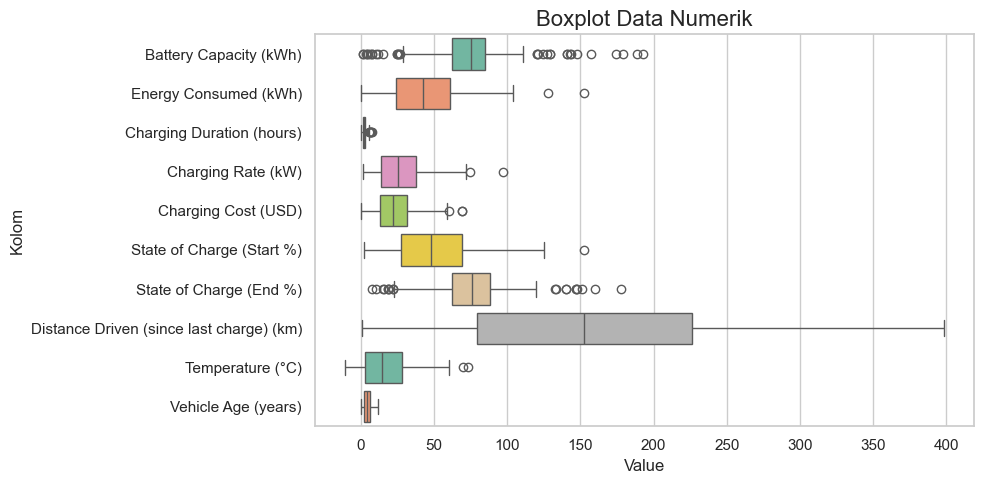

In [7]:
plt.figure(figsize=(10, 5))
sns.set(style="whitegrid")

numeric_data = df.select_dtypes(include=['float64', 'int64'])

sns.boxplot(data=numeric_data, orient='h', palette='Set2')

plt.title('Boxplot Data Numerik', fontsize=16)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Kolom', fontsize=12)

plt.tight_layout()
plt.show()

Visualisasi Distribusi Data Numerik

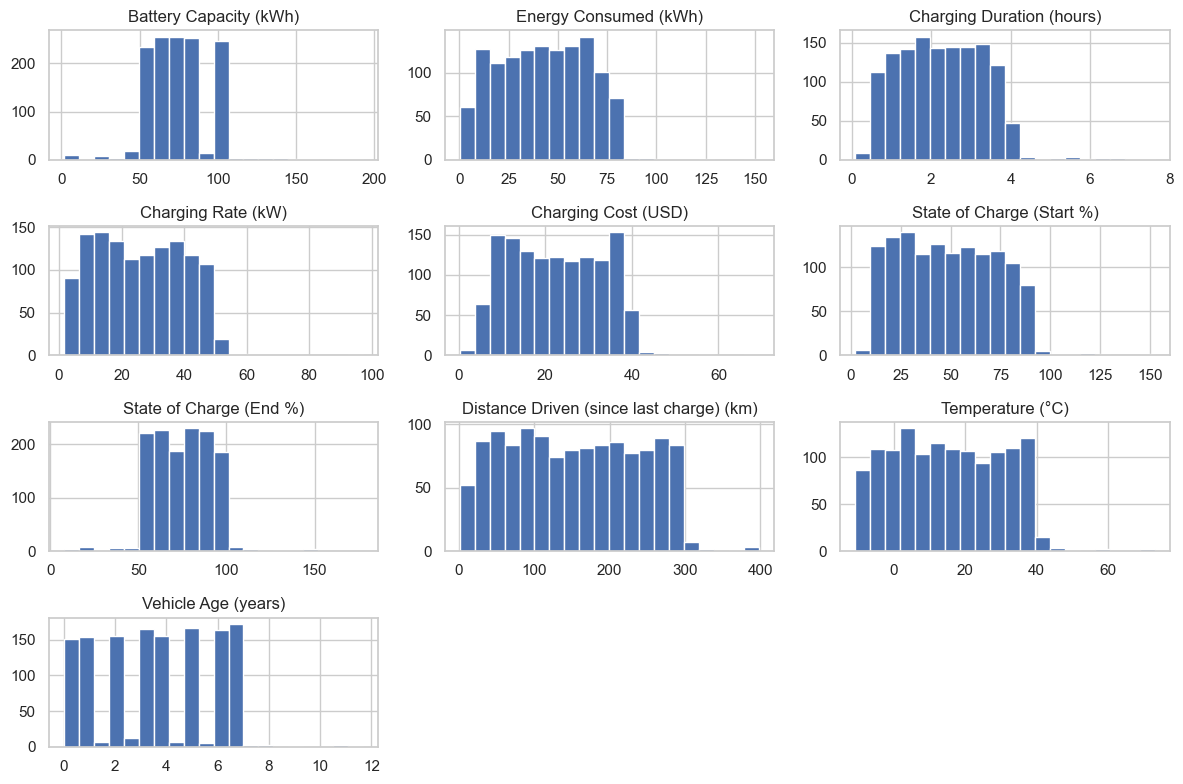

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [8]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns].hist(figsize=(12, 8), bins=20)

for column in numeric_columns:
    plt.tight_layout()
    plt.show()

Visualisasi Matrix Correlation antara kolom numerik

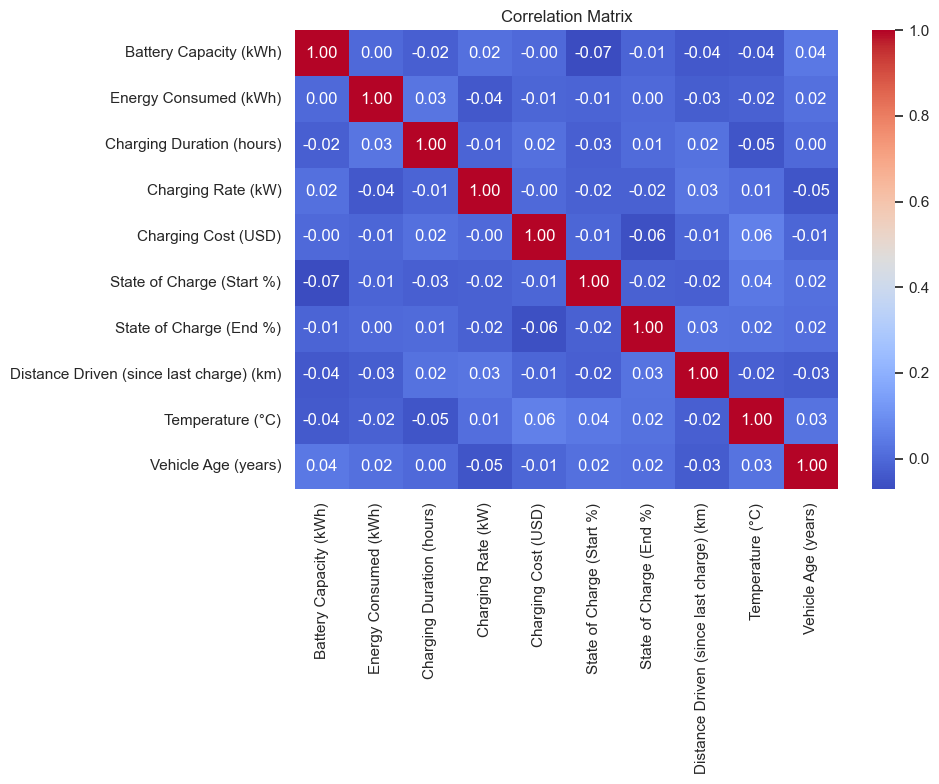

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

Visualisasi Distribusi Kolom Kategorik

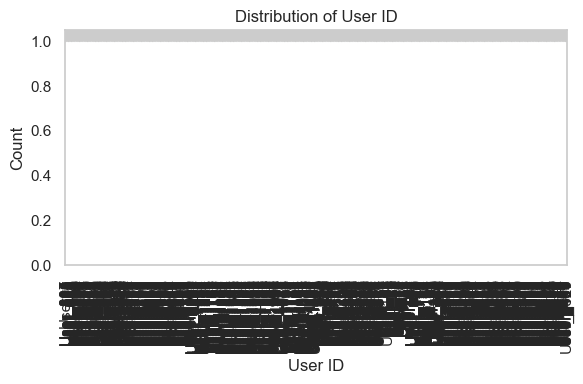

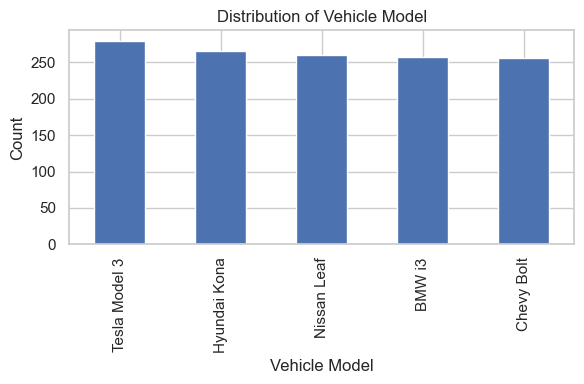

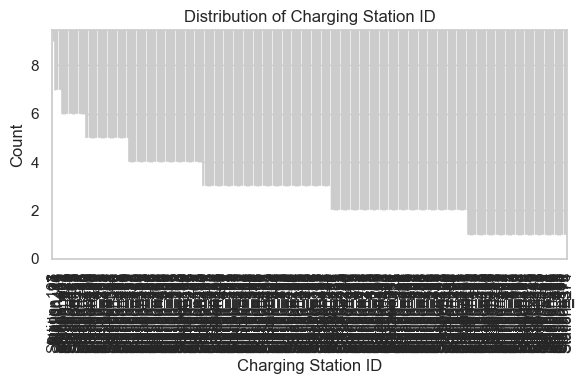

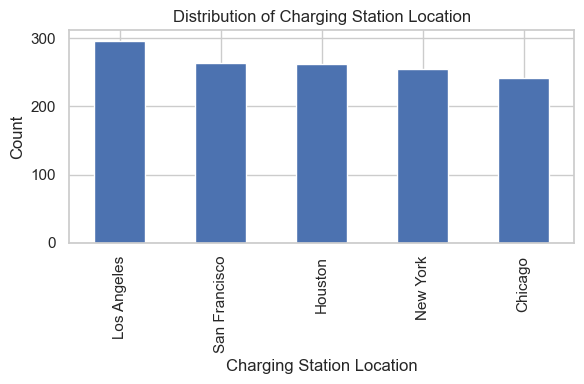

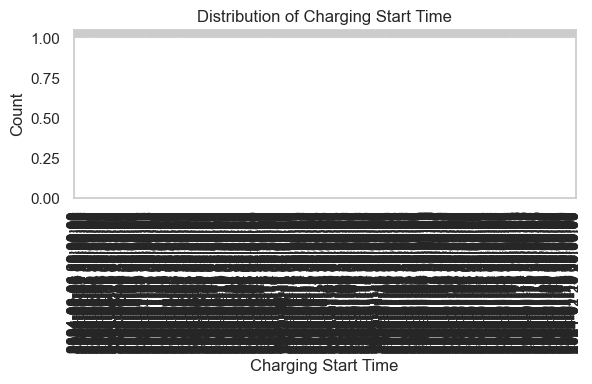

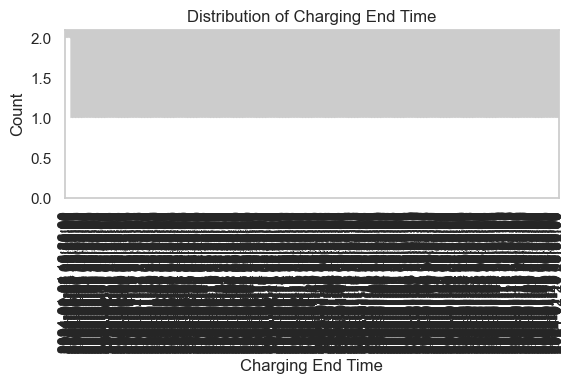

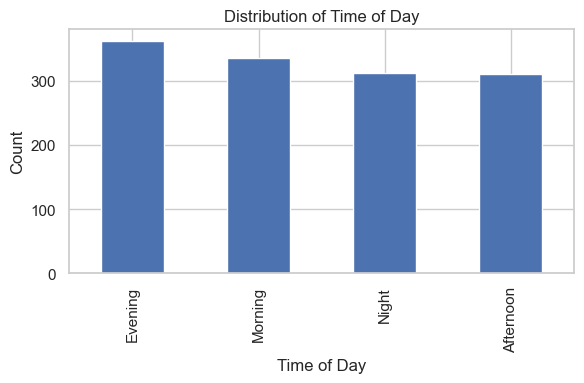

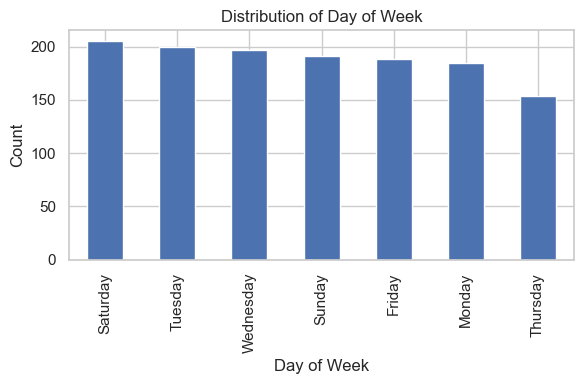

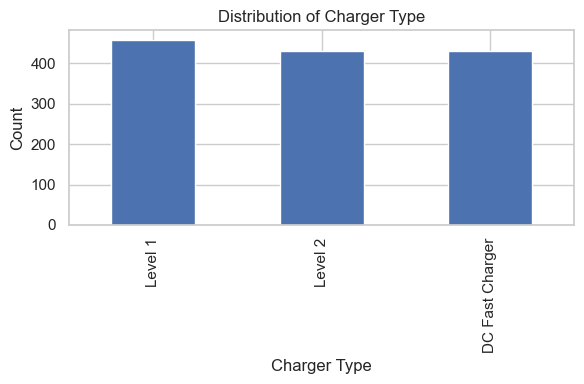

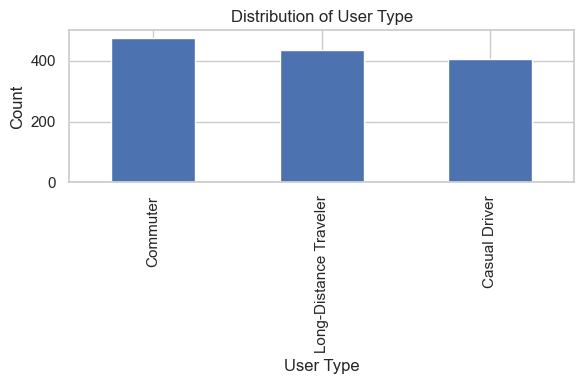

In [10]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

## **Data Preprocessing**

### Drop kolom tidak Relevan

Drop kolom `User ID`, `Charging Station ID`, `Charging Station Location`, `Charging Start Time`, `Charging End Time`.

karena kolom tersebut tidak relevan untuk dipakai dalam analisis.

In [11]:
drop_cols = ['User ID', 'Charging Station ID', 'Charging Station Location', 
             'Charging Start Time', 'Charging End Time']
df.drop(columns=drop_cols, inplace=True)

### Drop data duplikat

Membersihkan data duplikat

In [12]:
duplicates = df[df.duplicated()]
print(f"Jumlah baris duplikat: {duplicates.shape[0]}")

df.drop_duplicates(inplace=True)
print(f"Jumlah baris data setelah menghapus duplikat: {df.shape[0]}")

Jumlah baris duplikat: 0
Jumlah baris data setelah menghapus duplikat: 1320


### Missing Value Handling

Menangani data null

In [13]:
df['Energy Consumed (kWh)'].fillna(df['Energy Consumed (kWh)'].median(), inplace=True)
df['Charging Rate (kW)'].fillna(df['Charging Rate (kW)'].mean(), inplace=True)
df['Distance Driven (since last charge) (km)'].fillna(df['Distance Driven (since last charge) (km)'].median(), inplace=True)

print("Jumlah data Null setelah di cleaning:")
print(df.isnull().sum())

Jumlah data Null setelah di cleaning:
Vehicle Model                               0
Battery Capacity (kWh)                      0
Energy Consumed (kWh)                       0
Charging Duration (hours)                   0
Charging Rate (kW)                          0
Charging Cost (USD)                         0
Time of Day                                 0
Day of Week                                 0
State of Charge (Start %)                   0
State of Charge (End %)                     0
Distance Driven (since last charge) (km)    0
Temperature (°C)                            0
Vehicle Age (years)                         0
Charger Type                                0
User Type                                   0
dtype: int64


### Data Outlier Handling

Menagani data Outlier

In [14]:
numeric_data = df.select_dtypes(include=['float64', 'int64']).copy()

Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_before = ((numeric_data < lower_bound) | (numeric_data > upper_bound)).sum()

numeric_data_clipped = numeric_data.apply(lambda x: np.clip(x, lower_bound[x.name], upper_bound[x.name]))
outliers_after = ((numeric_data_clipped < lower_bound) | (numeric_data_clipped > upper_bound)).sum()

outlier_summary = pd.DataFrame({
    'Kolom': numeric_data.columns,
    'Outlier Sebelum': outliers_before.values,
    'Outlier Setelah': outliers_after.values
})
df[numeric_data_clipped.columns] = numeric_data_clipped
print(outlier_summary)


                                      Kolom  Outlier Sebelum  Outlier Setelah
0                    Battery Capacity (kWh)               33                0
1                     Energy Consumed (kWh)                2                0
2                 Charging Duration (hours)                6                0
3                        Charging Rate (kW)                3                0
4                       Charging Cost (USD)                3                0
5                 State of Charge (Start %)                1                0
6                   State of Charge (End %)               19                0
7  Distance Driven (since last charge) (km)                0                0
8                          Temperature (°C)                2                0
9                       Vehicle Age (years)                0                0


Visualisasi Box Plot setelah Outlier ditangani

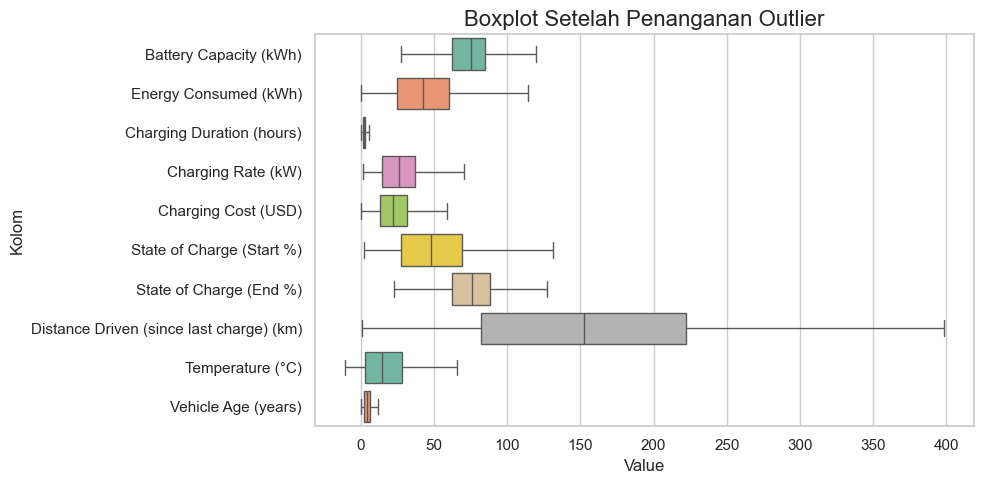

In [15]:
plt.figure(figsize=(10, 5))
sns.set(style="whitegrid")


sns.boxplot(data=numeric_data_clipped, orient='h', palette='Set2')

plt.title('Boxplot Setelah Penanganan Outlier', fontsize=16)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Kolom', fontsize=12)

plt.tight_layout()
plt.show()

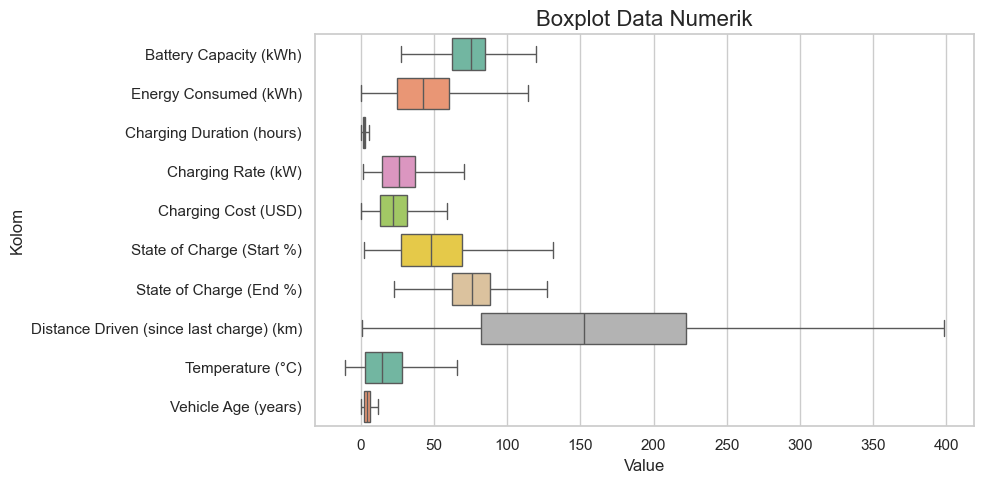

In [16]:
plt.figure(figsize=(10, 5))
sns.set(style="whitegrid")

numeric_data = df.select_dtypes(include=['float64', 'int64'])

sns.boxplot(data=numeric_data, orient='h', palette='Set2')

plt.title('Boxplot Data Numerik', fontsize=16)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Kolom', fontsize=12)

plt.tight_layout()
plt.show()

### Penanganan Data Inkonsisten

Mengidentifikasi data inkonsisten, misalnya State of Charge yang lebih besar dari 100%

In [17]:
df['State of Charge (Start %)'] = df['State of Charge (Start %)'].apply(lambda x: min(x, 100))
df['State of Charge (End %)'] = df['State of Charge (End %)'].apply(lambda x: min(x, 100))

## **Pre-Modeling**

### Data Encoding

In [18]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Encode categorical columns
categorical_cols = ['Vehicle Model', 'Time of Day', 'Day of Week', 'Charger Type', 'User Type']
for col in categorical_cols:
    if col in df.columns:
        df[col] = LabelEncoder().fit_transform(df[col])


In [19]:
df = df.dropna()

In [20]:
df_kmeans = df.copy()
df_nb = df.copy()
df_Logres = df.copy()

## **Modeling**

Import Library

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, silhouette_score, ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize

### **K-Means Clustering**

#### Pre-Processing

Pisahkan fitur dan target

In [22]:
df_kmeans.drop(columns=['User Type'], inplace=True)

In [23]:
numeric_columns = df_kmeans.select_dtypes(include=['float64', 'int64']).columns
scaler_kmeans = StandardScaler()
df_kmeans.loc[:, numeric_columns] = scaler_kmeans.fit_transform(df_kmeans[numeric_columns])

In [24]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_kmeans[numeric_columns])

df_kmeans.loc[:, ['PCA1', 'PCA2']] = df_pca

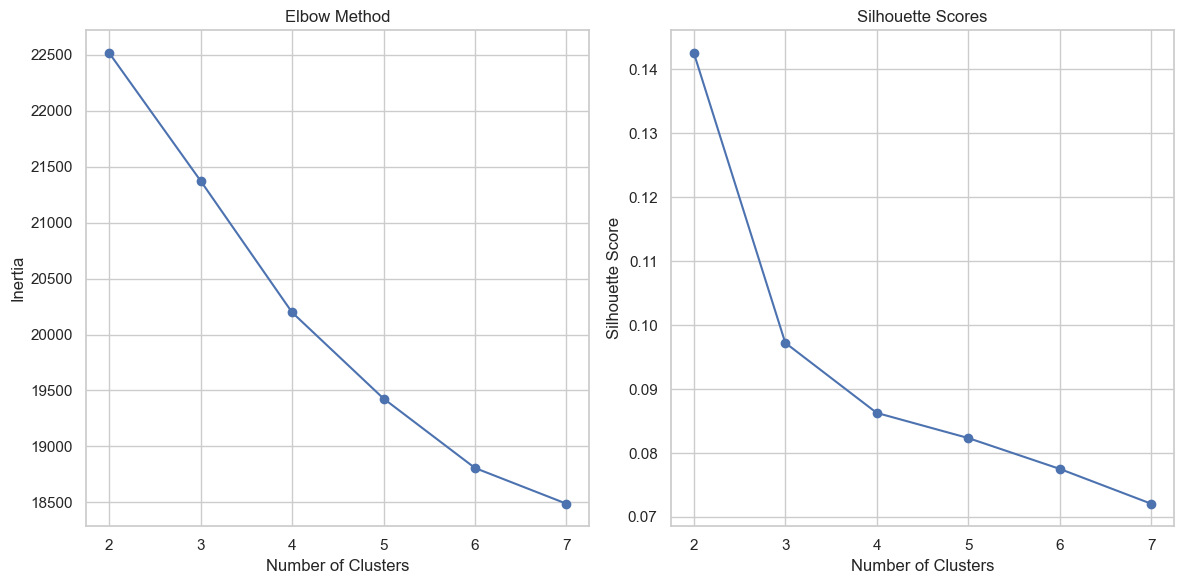

In [25]:
# Elbow + Silhouette (optional)
inertia = []
silhouette_scores = []
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_kmeans)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_kmeans, kmeans.labels_))
    
# Plot elbow curve
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 8), inertia, marker='o')
plt.title('Elbow Method')   
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

# Plot silhouette scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 8), silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.show()

#### **Build the Model**

In [26]:
kmeans = KMeans(n_clusters=3, random_state=42)
df_kmeans['Cluster'] = kmeans.fit_predict(df_kmeans[['PCA1', 'PCA2']])

#### **Evaluate the Model (before tuning)**

Visualisasi plot klusterisasi k-means

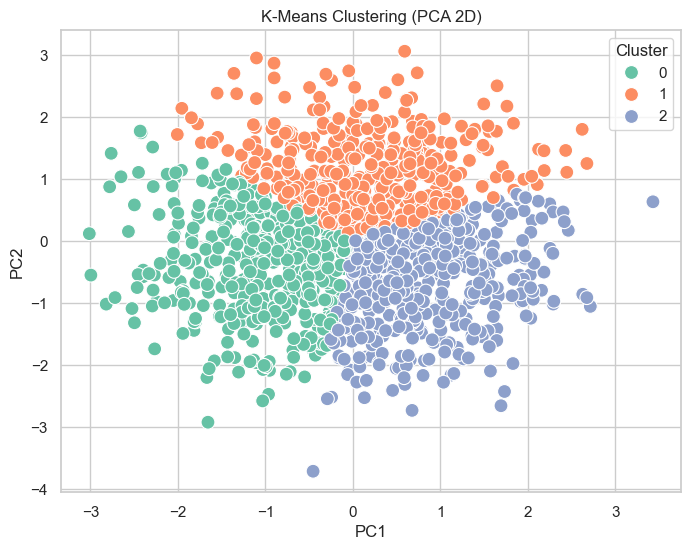

In [27]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_kmeans,  palette='Set2', s=100)
plt.title("K-Means Clustering (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

Menghitung Silhouette Score

In [28]:
score = silhouette_score(df_kmeans[['PCA1', 'PCA2']], df_kmeans['Cluster'])
print(f'Silhouette Score: {score:.4f}')

Silhouette Score: 0.3333


#### **Model Tuning**

In [29]:
from sklearn.model_selection import ParameterGrid

In [30]:
param_grid = {
    'n_clusters': range(2, 10),  # 2 sampai 10
    'init': ['k-means++'],
    'n_init': [10],
    'max_iter': [300]
}

In [31]:
grid = list(ParameterGrid(param_grid))

In [32]:
results = []

for params in grid:
    kmeans = KMeans(**params, random_state=42)
    labels = kmeans.fit_predict(df_kmeans[['PCA1', 'PCA2']])
    score = silhouette_score(df_kmeans[['PCA1', 'PCA2']], labels)
    results.append({
        'params': params,
        'score': score
    })

#### **Evaluate the Model (after tuning)**

In [33]:
results_df = pd.DataFrame(results)
print(results_df.sort_values(by='score', ascending=False))

                                              params     score
4  {'init': 'k-means++', 'max_iter': 300, 'n_clus...  0.343065
1  {'init': 'k-means++', 'max_iter': 300, 'n_clus...  0.340036
5  {'init': 'k-means++', 'max_iter': 300, 'n_clus...  0.329790
7  {'init': 'k-means++', 'max_iter': 300, 'n_clus...  0.325159
2  {'init': 'k-means++', 'max_iter': 300, 'n_clus...  0.322097
6  {'init': 'k-means++', 'max_iter': 300, 'n_clus...  0.321816
3  {'init': 'k-means++', 'max_iter': 300, 'n_clus...  0.319997
0  {'init': 'k-means++', 'max_iter': 300, 'n_clus...  0.313981


In [34]:
best_result = results_df.loc[results_df['score'].idxmax()]

In [35]:
print("Parameter terbaik:", best_result['params'])
print("Silhouette Score terbaik:", best_result['score'])

Parameter terbaik: {'init': 'k-means++', 'max_iter': 300, 'n_clusters': 6, 'n_init': 10}
Silhouette Score terbaik: 0.3430651641158368


### **Naive Bayes Classification**

#### **Pre-Processing**

Pisahkan fitur dengan target

feature selection

In [36]:
df_nb.head()

,Vehicle Model,Battery Capacity (kWh),Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,0,108.463007,60.712346,0.591363,36.389181,13.087717,1,5,29.371576,86.119962,293.602111,27.947953,2.0,0,1
1,2,100.000000,12.339275,3.133652,30.677735,21.128448,2,1,10.115778,84.664344,112.112804,14.311026,3.0,1,0
2,1,75.000000,19.128876,2.452653,27.513593,35.667270,2,4,6.854604,69.917615,71.799253,21.002002,2.0,2,1
3,2,50.000000,79.457824,1.266431,32.882870,13.036239,1,2,83.120003,99.624328,199.577785,38.316313,1.0,1,2
4,2,50.000000,19.629104,2.019765,10.215712,10.161471,2,2,54.258950,63.743786,203.661847,-7.834199,1.0,1,2


In [37]:
# selected_features = ['State of Charge (End %)', 'Temperature (°C)', 'Distance Driven (since last charge) (km)', 'Charger Type', 'Energy Consumed (kWh)', 'Charging Rate (kW)', 'State of Charge (Start %)', 'Charging Duration (hours)', 'Day of Week', 'Charging Cost (USD)']

In [38]:
selected_features = ['Energy Consumed (kWh)', 'Charging Duration (hours)', 'Charging Rate (kW)', 'State of Charge (Start %)', 'State of Charge (End %)', 'Distance Driven (since last charge) (km)', 'Temperature (°C)', 'Charger Type']

In [39]:
# X_nb = df_nb.drop(columns=['User Type'])
X_nb = df_nb[selected_features]
y_nb = df_nb['User Type']

In [40]:
print(y_nb)

0       1
1       0
2       1
3       2
4       2
       ..
1315    1
1316    0
1317    1
1318    1
1319    1
Name: User Type, Length: 1320, dtype: int32


In [41]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X_nb, y_nb, test_size=0.3, random_state=42)

Standarisasi

In [42]:
scaler_nb = StandardScaler()
X_train_scaled = scaler_nb.fit_transform(X_train)
X_test_scaled = scaler_nb.transform(X_test)

#### **Build the Model**

Fit Model

In [43]:
model = GaussianNB()
model.fit(X_train_scaled, y_train)

GaussianNB()

In [44]:
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)

#### **Evaluate the Model (before tuning)**

In [45]:
from sklearn.metrics import accuracy_score

# Evaluasi
akurasi_nb = accuracy_score(y_test, y_pred)

print(f"Akurasi Naive Bayes: {akurasi_nb:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Akurasi Naive Bayes: 0.3535
Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.21      0.26       118
           1       0.36      0.49      0.41       143
           2       0.35      0.33      0.34       135

    accuracy                           0.35       396
   macro avg       0.35      0.34      0.34       396
weighted avg       0.35      0.35      0.34       396

Confusion Matrix:
[[25 57 36]
 [26 70 47]
 [20 70 45]]


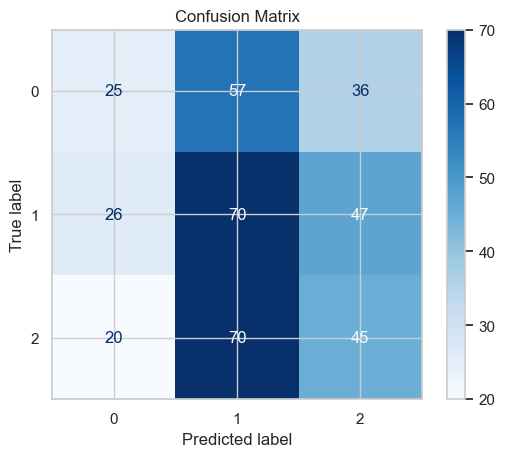

In [46]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [47]:
# ROC AUC Score (One vs Rest for multi-class classification)
y_test_bin = label_binarize(y_test, classes=model.classes_)
y_pred_prob = model.predict_proba(X_test)

roc_auc = roc_auc_score(y_test_bin, y_pred_prob, average='macro', multi_class='ovr')
print(f"ROC AUC Score: {roc_auc}")

ROC AUC Score: 0.5110585509746739


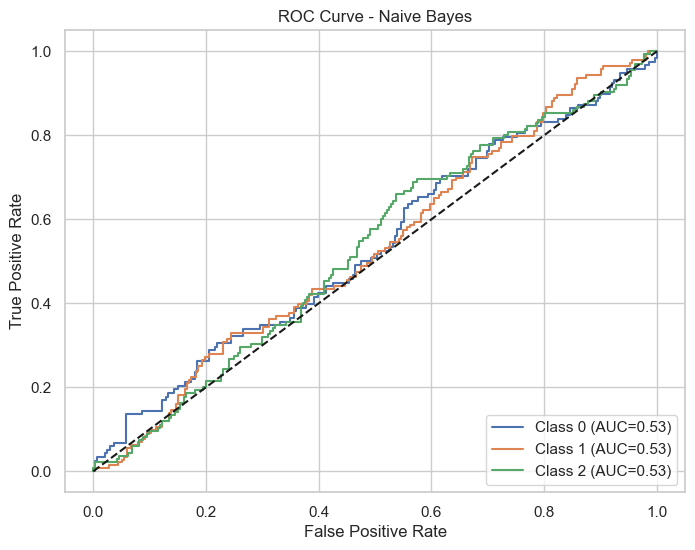

In [48]:
# ROC Curve
y_test_bin = label_binarize(y_test, classes=np.unique(y_nb))
fpr, tpr, roc_auc = {}, {}, {}
for i in range(y_test_bin.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8,6))
for i in range(len(roc_auc)):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC={roc_auc[i]:.2f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Naive Bayes")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#### **Model Tuning**

In [49]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score

# Coba berbagai jumlah fitur terbaik
best_score = 0
best_k = 0
best_features = None

for k in range(3, X_nb.shape[1]+1):
    selector = SelectKBest(score_func=f_classif, k=k)
    X_new = selector.fit_transform(X_nb, y_nb)
    model = GaussianNB()
    scores = cross_val_score(model, X_new, y_nb, cv=5, scoring='accuracy')
    mean_score = scores.mean()
    if mean_score > best_score:
        best_score = mean_score
        best_k = k
        best_features = selector.get_support(indices=True)

print(f"Best number of features: {best_k}")
print(f"Best cross-validated accuracy: {best_score:.4f}")
print("Selected feature columns:", X_nb.columns[best_features])

# Gunakan fitur terbaik untuk training dan testing
X_nb_selected = X_nb.iloc[:, best_features]
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_nb_selected, y_nb, test_size=0.3, random_state=42)
scaler_nb_sel = StandardScaler()
X_train_sel_scaled = scaler_nb_sel.fit_transform(X_train_sel)
X_test_sel_scaled = scaler_nb_sel.transform(X_test_sel)

Best number of features: 8
Best cross-validated accuracy: 0.3712
Selected feature columns: Index(['Energy Consumed (kWh)', 'Charging Duration (hours)',
       'Charging Rate (kW)', 'State of Charge (Start %)',
       'State of Charge (End %)', 'Distance Driven (since last charge) (km)',
       'Temperature (°C)', 'Charger Type'],
      dtype='object')


#### **Evaluate the Model (after tuning)**

In [50]:
# Train dan evaluasi ulang model Naive Bayes
model_sel = GaussianNB()
model_sel.fit(X_train_sel_scaled, y_train_sel)
y_pred_sel = model_sel.predict(X_test_sel_scaled)
print("Classification Report (Selected Features):")
print(classification_report(y_test_sel, y_pred_sel))
print("Confusion Matrix (Selected Features):")
cm_sel = confusion_matrix(y_test_sel, y_pred_sel)
print("akurasi Naive Bayes (Selected Features):", accuracy_score(y_test_sel, y_pred_sel))
disp_sel = ConfusionMatrixDisplay(confusion_matrix=cm_sel, display_labels=model_sel.classes_)

Classification Report (Selected Features):
              precision    recall  f1-score   support

           0       0.35      0.21      0.26       118
           1       0.36      0.49      0.41       143
           2       0.35      0.33      0.34       135

    accuracy                           0.35       396
   macro avg       0.35      0.34      0.34       396
weighted avg       0.35      0.35      0.34       396

Confusion Matrix (Selected Features):
akurasi Naive Bayes (Selected Features): 0.35353535353535354


### **Logistic Regression**

#### **Pre-Processing**

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
# X_logres = df_Logres.drop(columns=['User Type'])
X_logres = df_Logres[selected_features]
y_logres = df_Logres['User Type']

In [53]:
scaler_logres = StandardScaler()
X_logres_scaled = scaler_logres.fit_transform(X_logres)

In [54]:
x_train_logres, x_test_logres, y_train_logres, y_test_logres = train_test_split(X_logres_scaled, y_logres, test_size=0.3, random_state=42)

#### **Build the Model**

Fit Model

In [55]:
model_logres = LogisticRegression()
model_logres.fit(x_train_logres, y_train_logres)

LogisticRegression()

In [56]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_logres = model_logres.predict(x_test_logres)

print("Akurasi:", accuracy_score(y_test_logres, y_pred_logres))
print("Laporan Klasifikasi:\n", classification_report(y_test_logres,y_pred_logres))

Akurasi: 0.3787878787878788
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.33      0.18      0.23       118
           1       0.39      0.57      0.47       143
           2       0.38      0.35      0.36       135

    accuracy                           0.38       396
   macro avg       0.37      0.37      0.35       396
weighted avg       0.37      0.38      0.36       396



#### **Evaluate the Model (before tuning)**

Akurasi Model Logistic Regression: 0.3788
laporan klasifikasi:
              precision    recall  f1-score   support

           0       0.33      0.18      0.23       118
           1       0.39      0.57      0.47       143
           2       0.38      0.35      0.36       135

    accuracy                           0.38       396
   macro avg       0.37      0.37      0.35       396
weighted avg       0.37      0.38      0.36       396



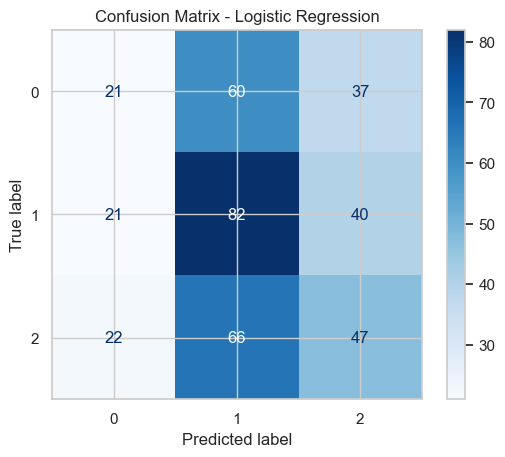

In [57]:
accuracy_logres = accuracy_score(y_test_logres, y_pred_logres)
print(f"Akurasi Model Logistic Regression: {accuracy_logres:.4f}")

print("laporan klasifikasi:")
print(classification_report(y_test_logres, y_pred_logres))
# Confusion Matrix
cm_logres = confusion_matrix(y_test_logres, y_pred_logres)
disp_logres = ConfusionMatrixDisplay(confusion_matrix=cm_logres, display_labels=model_logres.classes_)
disp_logres.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [58]:
print("ROC AUC Score for Logistic Regression:")
y_test_logres_bin = label_binarize(y_test_logres, classes=model_logres.classes_)
y_pred_logres_prob = model_logres.predict_proba(x_test_logres)
roc_auc_logres = roc_auc_score(y_test_logres_bin, y_pred_logres_prob, average='macro', multi_class='ovr')
print(f"ROC AUC Score: {roc_auc_logres}")

ROC AUC Score for Logistic Regression:
ROC AUC Score: 0.5487487546882609


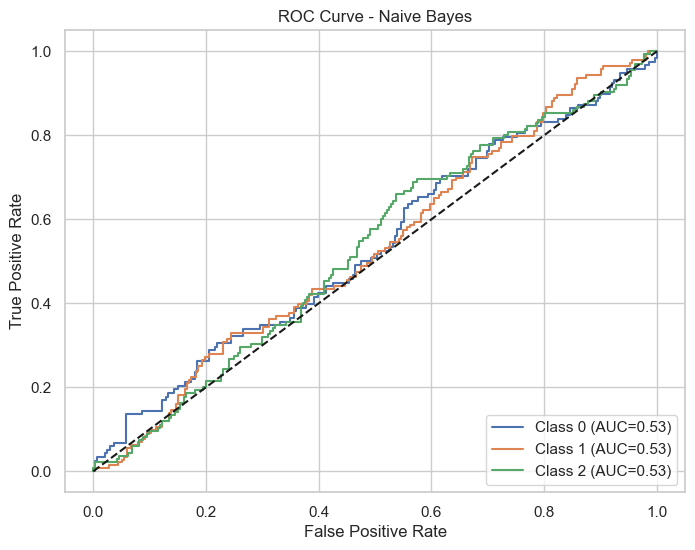

In [59]:
# ROC Curve
y_test_bin_logres = label_binarize(y_test, classes=np.unique(y_nb))
fpr_logres, tpr_logres, roc_auc_logres = {}, {}, {}
for l in range(y_test_bin_logres.shape[1]):
    fpr_logres[l], tpr_logres[l], _ = roc_curve(y_test_bin[:, l], y_proba[:, l])
    roc_auc_logres[l] = auc(fpr_logres[l], tpr_logres[l])

plt.figure(figsize=(8,6))
for l in range(len(roc_auc_logres)):
    plt.plot(fpr_logres[l], tpr_logres[l], label=f"Class {l} (AUC={roc_auc_logres[l]:.2f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Naive Bayes")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#### **Model Tuning**

In [60]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Logistic Regression
param_grid_logres = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear'],
    'multi_class': ['auto'],
    'max_iter': [200, 500]
}

logres = LogisticRegression()
grid_search_logres = GridSearchCV(logres, param_grid_logres, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_logres.fit(x_train_logres, y_train_logres)
print("Best parameters:", grid_search_logres.best_params_)
print("Best cross-validated accuracy:", grid_search_logres.best_score_)

Best parameters: {'C': 0.01, 'max_iter': 200, 'multi_class': 'auto', 'solver': 'lbfgs'}
Best cross-validated accuracy: 0.35821974148061103


#### **Evaluate the Model (after tuning)**

In [61]:
# Train the best model
best_logres = grid_search_logres.best_estimator_
best_logres.fit(x_train_logres, y_train_logres)
# Evaluate the best model
y_pred_best_logres = best_logres.predict(x_test_logres)
print("Akurasi Model Logistic Regression (Best):", accuracy_score(y_test_logres, y_pred_best_logres))
print("Laporan Klasifikasi (Best):\n", classification_report(y_test_logres, y_pred_best_logres))

Akurasi Model Logistic Regression (Best): 0.3813131313131313
Laporan Klasifikasi (Best):
               precision    recall  f1-score   support

           0       0.36      0.15      0.21       118
           1       0.38      0.62      0.47       143
           2       0.39      0.33      0.36       135

    accuracy                           0.38       396
   macro avg       0.38      0.37      0.35       396
weighted avg       0.38      0.38      0.36       396



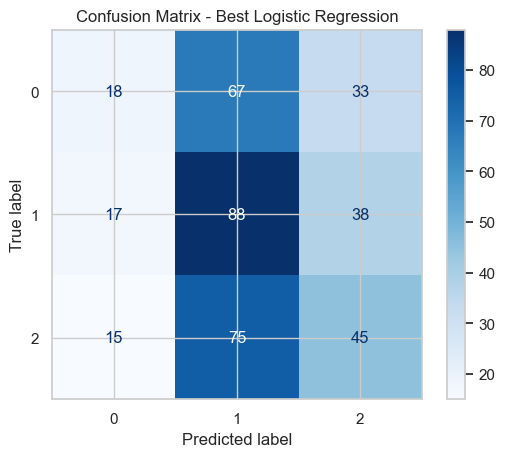

In [62]:
# Confusion Matrix for Best Model
cm_best_logres = confusion_matrix(y_test_logres, y_pred_best_logres)
disp_best_logres = ConfusionMatrixDisplay(confusion_matrix=cm_best_logres, display_labels=best_logres.classes_)
disp_best_logres.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Best Logistic Regression')
plt.show()

ROC AUC Score (Best): 0.548754745580977


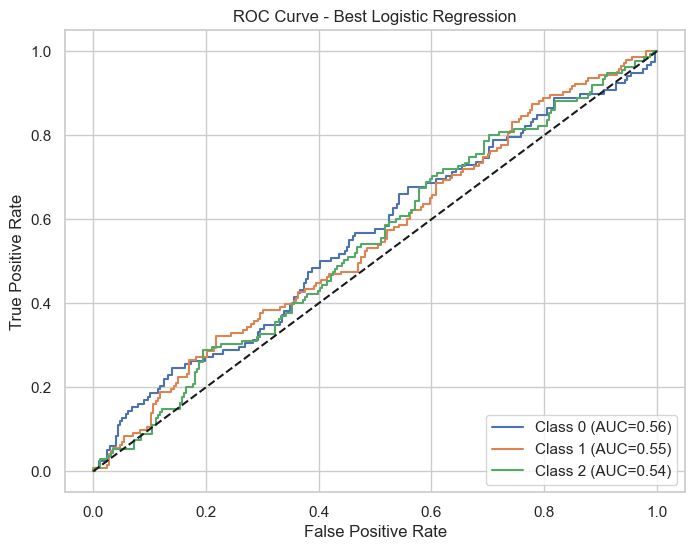

In [63]:
# ROC AUC Score for Best Logistic Regression
y_test_best_logres_bin = label_binarize(y_test_logres, classes=best_logres.classes_)
y_pred_best_logres_prob = best_logres.predict_proba(x_test_logres)
roc_auc_best_logres = roc_auc_score(y_test_best_logres_bin, y_pred_best_logres_prob, average='macro', multi_class='ovr')
print(f"ROC AUC Score (Best): {roc_auc_best_logres}")
# ROC Curve for Best Logistic Regression
fpr_best_logres, tpr_best_logres, roc_auc_best_logres = {}, {}, {}
for l in range(y_test_best_logres_bin.shape[1]):
    fpr_best_logres[l], tpr_best_logres[l], _ = roc_curve(y_test_best_logres_bin[:, l], y_pred_best_logres_prob[:, l])
    roc_auc_best_logres[l] = auc(fpr_best_logres[l], tpr_best_logres[l])
plt.figure(figsize=(8,6))
for l in range(len(roc_auc_best_logres)):
    plt.plot(fpr_best_logres[l], tpr_best_logres[l], label=f"Class {l} (AUC={roc_auc_best_logres[l]:.2f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Best Logistic Regression")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## **Deployment**

In [73]:
import joblib
joblib.dump(model, 'model_nb.pkl')
joblib.dump(scaler_nb, 'scaler_nb.pkl')
joblib.dump(model_logres, 'model_logres.pkl')
joblib.dump(scaler_logres, 'scaler_logres.pkl')

['scaler_logres.pkl']

In [71]:
!ngrok config add-authtoken 2yEAiy37Brwm6PbTX6XoD9nHmUo_6UzpCsHpka8k8iTreKNTp # Ganti dengan token ngrok Anda

ERROR:  accepts 1 arg(s), received 7


In [ ]:
%%writefile app.py
import streamlit as st
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

model_nb = joblib.load("model_nb.pkl")
model_lr = joblib.load("model_logres.pkl")

scaler_nb = joblib.load("scaler_nb.pkl")
scaler_lr = joblib.load("scaler_logres.pkl")

# Dummy accuracy scores
accuracy_scores = {
    "Naive Bayes": 35.4,
    "Logistic Regression": 37.9
}

# =================== Streamlit UI ===================
st.set_page_config(page_title="EV User Type Predictor", layout="centered")
st.title("🚗 EV User Type Predictor")
st.markdown("Masukkan data sesi pengisian daya di bawah ini untuk memprediksi **User Type** dan **karakteristik kluster** pengguna.")

# Model selection
model_choice = st.selectbox("Pilih Model", ["Naive Bayes", "Logistic Regression"])
st.markdown(f"**Akurasi model:** {accuracy_scores[model_choice]}%")

# Input form
with st.form("input_form"):
    col1, col2 = st.columns(2)

    with col1:
        energy = st.number_input("Energy Consumed (kWh)", min_value=0.0, max_value=100.0, step=0.1)
        duration = st.number_input("Charging Duration (hours)", min_value=0.0, max_value=24.0, step=0.1)
        rate = st.number_input("Charging Rate (kW)", min_value=0.0, max_value=300.0, step=0.5)
        soc_start = st.number_input("State of Charge (Start %)", min_value=0, max_value=100)

    with col2:
        soc_end = st.number_input("State of Charge (End %)", min_value=0, max_value=100)
        distance = st.number_input("Distance Driven (since last charge) (km)", min_value=0.0, max_value=1000.0, step=1.0)
        temp = st.number_input("Temperature (\u00b0C)", min_value=-10.0, max_value=73.0, step=0.5)
        charger_type = st.selectbox("Charger Type", options=["Level 1", "Level 2", "DC Fast"], index=0)

    submitted = st.form_submit_button("🔍 Submit")

# Charger type mapping
charger_map = {"Level 1": 0, "Level 2": 1, "DC Fast": 2}

if submitted:
    try:
        input_data = np.array([[energy, duration, rate, soc_start, soc_end, distance, temp, charger_map[charger_type]]])

        # Validasi manual
        if soc_end < soc_start:
            st.error("❌ End SOC tidak boleh lebih kecil dari Start SOC.")
        else:
            # Standarisasi
            if model_choice == "Naive Bayes":
                scaler = scaler_nb
            else:
                scaler = scaler_lr
            input_scaled = scaler.transform(input_data)

            # Prediksi
            if model_choice == "Naive Bayes":
                prediction = model_nb.predict(input_scaled)[0]
            else:
                prediction = model_lr.predict(input_scaled)[0]

            # Karakteristik kluster 
            cluster_info = {
                0: "🔋 Commuter - penggunaan rutin, jarak sedang, pengisian stabil",
                1: "🚀 Long Distance - jarak jauh, biaya besar, SOC tinggi",
                2: "🌿 Casual Driver - jarang isi, hemat energi"
            }

            # Output prediksi dan karakteristik
            st.success(f"✅ Prediksi: **User Type {prediction}**")
            st.info(cluster_info.get(prediction, "Karakteristik tidak diketahui."))

    except Exception as e:
        st.error(f"❌ Terjadi kesalahan: {e}")


Overwriting app.py


In [67]:
from pyngrok import ngrok
import threading
import time
import os

In [72]:
def run_streamlit():
    os.system("streamlit run app.py --server.port 8500")

thread = threading.Thread(target=run_streamlit, daemon=True)
thread.start()

time.sleep(5)

public_url = ngrok.connect(addr=8500)
print(f"Streamlit app is live at: {public_url}")

t=2025-06-08T20:32:04+0700 lvl=warn msg="failed to check for update" obj=updater err="Post \"https://update.equinox.io/check\": context deadline exceeded"
t=2025-06-08T20:32:09+0700 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="failed to dial ngrok server with address \"connect.us.ngrok-agent.com:443\": dial tcp: lookup connect.us.ngrok-agent.com: i/o timeout"
t=2025-06-08T20:32:22+0700 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="failed to send authentication request: failed to fetch CRL. errors encountered: timed out fetching CRL"


PyngrokNgrokError: The ngrok process errored on start: failed to send authentication request: failed to fetch CRL. errors encountered: timed out fetching CRL.